In [915]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt


In [916]:
iris = pd.read_csv('iris.csv')

In [917]:
iris = iris.drop("Id",axis=1)

In [918]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [919]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

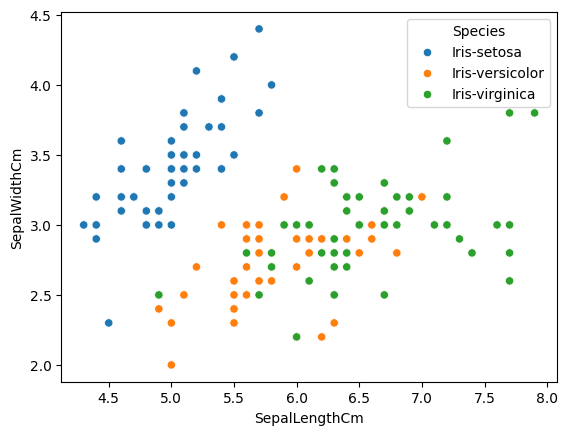

In [920]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species')


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

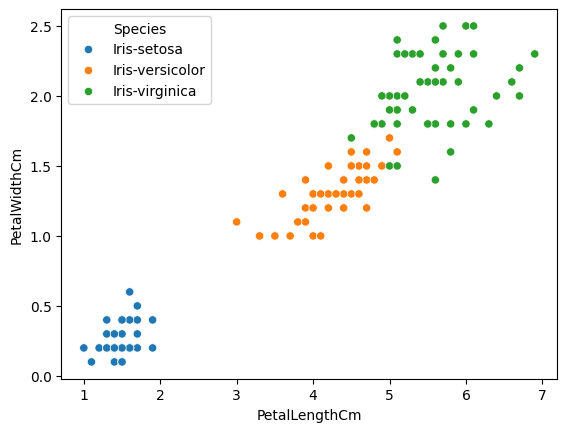

In [921]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species')

In [922]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [923]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]


In [924]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [925]:
"""range1 = iris["SepalLengthCm"].max() - iris["SepalLengthCm"].min()
print(range1)
iris["SepalLengthCm"] = (iris["SepalLengthCm"] - iris["SepalLengthCm"].min())/range1"""

'range1 = iris["SepalLengthCm"].max() - iris["SepalLengthCm"].min()\nprint(range1)\niris["SepalLengthCm"] = (iris["SepalLengthCm"] - iris["SepalLengthCm"].min())/range1'

In [926]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [927]:
range_value = np.float64(10)

def train_knn():
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    scores = []
    for i in np.arange(1, 10):
        knn1=KNeighborsClassifier(n_neighbors=i)
        knn1.fit(x_train, y_train)
        scores.append(knn1.score(x_test, y_test))
    print(scores)
    kfold = KFold(n_splits=5)
    print(cross_val_score(knn, x, y, cv=kfold, scoring='accuracy').mean())

In [928]:
# Run the function
train_knn()

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

[0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333]
0.9066666666666666


In [929]:
from sklearn.metrics import accuracy_score
def train_decisiontree():
    x = iris.drop(columns=['SepalLengthCm', 'SepalWidthCm','Species'])
    y = iris['Species']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)
    lr = DecisionTreeClassifier()
    lr.fit(x_train, y_train)
    print(x_train, y_train)
    # Test veri seti üzerinde tahmin yap
    y_pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Doğruluğu: {accuracy * 100:.2f}%")
    # Sonuçları görselleştir
    plt.figure(figsize=(20,10))
    plot_tree(lr, filled=True, fontsize=10,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],feature_names=x_train.columns)
    plt.show()

    cm=confusion_matrix(y_test, y_pred)
    print(cm)




     PetalLengthCm  PetalWidthCm
123            4.9           1.8
24             1.9           0.2
25             1.6           0.2
23             1.7           0.5
94             4.2           1.3
..             ...           ...
71             4.0           1.3
106            4.5           1.7
14             1.2           0.2
92             4.0           1.2
102            5.9           2.1

[90 rows x 2 columns] 123     Iris-virginica
24         Iris-setosa
25         Iris-setosa
23         Iris-setosa
94     Iris-versicolor
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 90, dtype: object
Model Doğruluğu: 98.33%


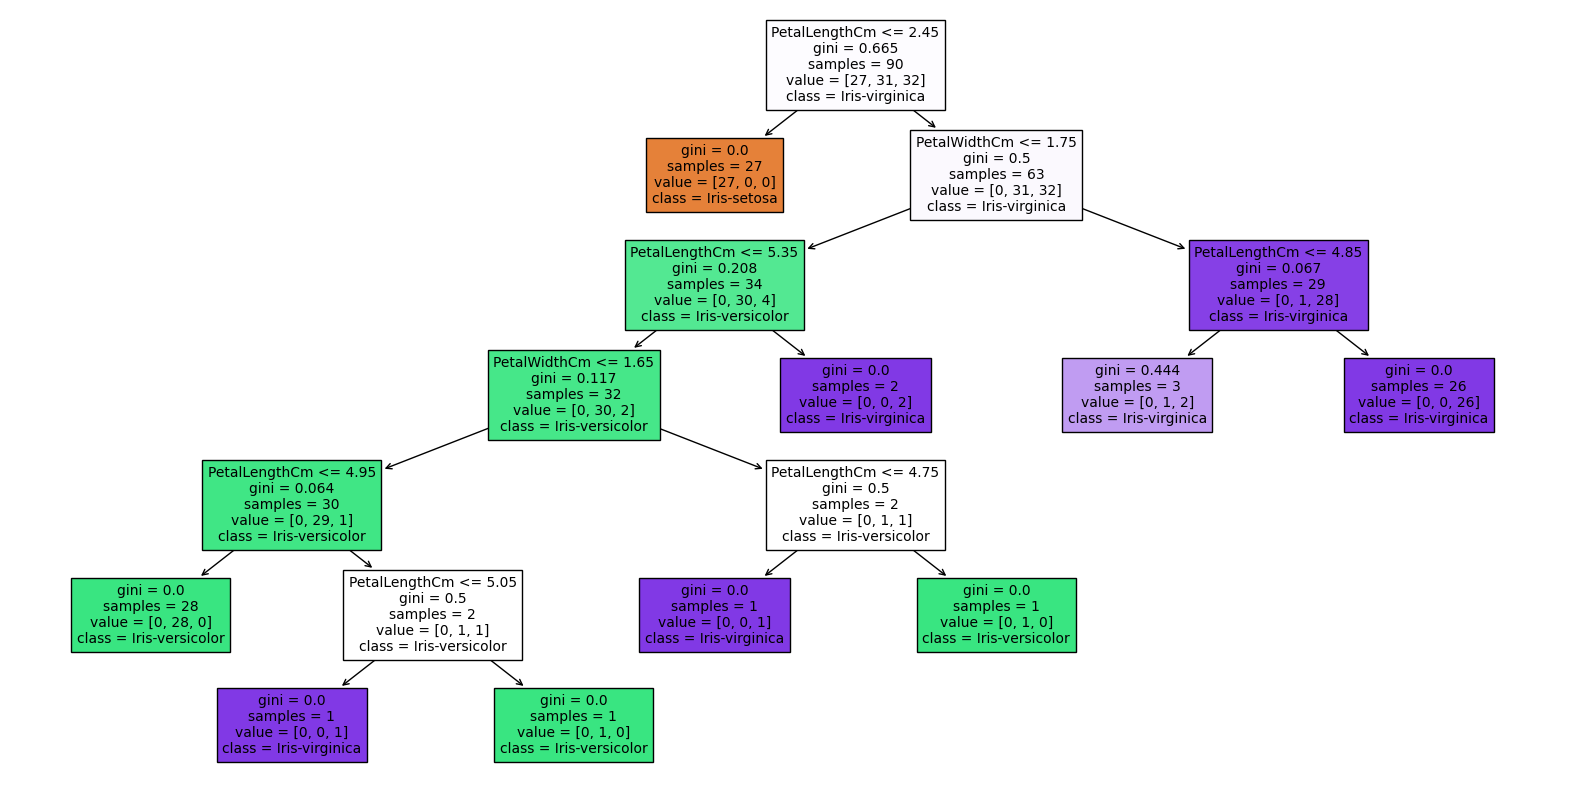

[[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [930]:
train_decisiontree()

In [931]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler 
from matplotlib.colors import ListedColormap


def train_naivebayes():
    x = iris.drop(columns=['SepalLengthCm', 'SepalWidthCm','Species'])
    y = iris['Species']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)
    # Feature Scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    lr = GaussianNB()
    lr.fit(x_train, y_train)
    print(x_train, y_train)
    # Test veri seti üzerinde tahmin yap
    y_pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Doğruluğu: {accuracy * 100:.2f}%")
    print(confusion_matrix(y_test, y_pred))
    # Sonuçları görselleştir
    
  

In [932]:
train_naivebayes()

[[ 0.62118971  0.74625413]
 [-1.1461572  -1.39439517]
 [-1.32289189 -1.39439517]
 [-1.26398033 -0.99302342]
 [ 0.20880876  0.07730122]
 [-1.38180345 -1.39439517]
 [ 0.20880876 -0.05648936]
 [ 1.68159786  1.28141645]
 [-1.44071502 -1.39439517]
 [ 0.26772033  0.07730122]
 [ 0.68010127  1.01383529]
 [-1.44071502 -1.39439517]
 [ 0.56227815  0.74625413]
 [ 0.73901284  0.88004471]
 [ 0.09098564 -0.32407052]
 [ 0.38554346  0.34488239]
 [ 0.91574753  1.41520703]
 [ 0.09098564  0.07730122]
 [-1.26398033 -1.126814  ]
 [-0.32139531 -0.32407052]
 [ 0.85683596  0.88004471]
 [-1.44071502 -1.39439517]
 [-1.55853814 -1.39439517]
 [-0.02683749 -0.19027994]
 [ 0.68010127  0.61246355]
 [-1.38180345 -1.52818575]
 [ 0.73901284  1.54899762]
 [-1.38180345 -1.39439517]
 [-1.32289189 -0.85923284]
 [ 0.56227815  0.74625413]
 [-0.49813    -0.19027994]
 [ 1.09248222  1.41520703]
 [ 0.73901284  0.47867297]
 [ 1.03357066  0.21109181]
 [ 1.32812847  1.41520703]
 [ 0.09098564  0.07730122]
 [-1.44071502 -1.39439517]
 